## Relationship Between Cattle Futures, Cash Price & Basis

- This notebook investigates the relationship between the live cattle and feeder cattle futures price with the national cash price of cattle greater 500 lbs.

In [1]:
import pandas as pd
import seaborn as sns

import src

import warnings
warnings.filterwarnings('ignore')

/Users/ericostring/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/ericostring/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


### Live cattle futures vs. Cash price

In [2]:
live_cattle_futures = pd.read_csv('csv/live_cattle_futures.csv')
live_cattle_futures = src.clean_tv_data(live_cattle_futures)

In [3]:
price_received_ge_500_national = pd.read_csv('csv/price_received_ge_500_national.csv')
price_received_ge_500_national = src.usda_clean_monthly(price_received_ge_500_national)

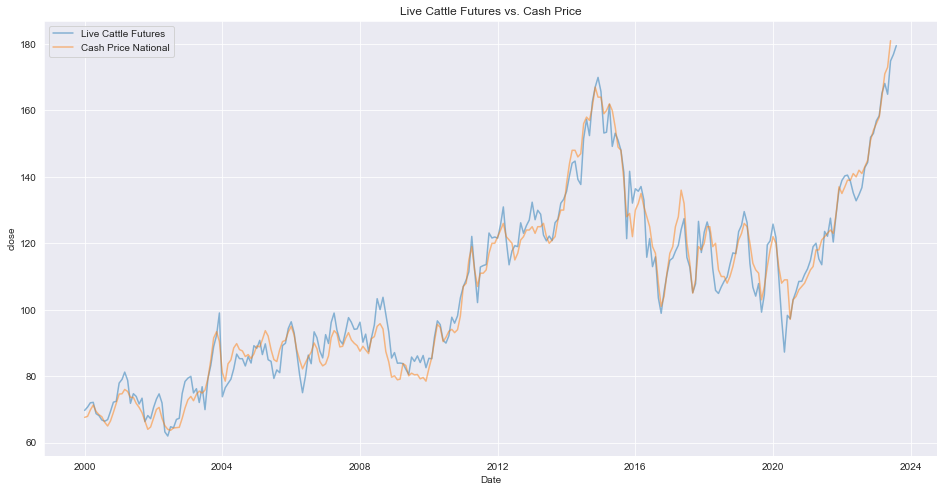

In [4]:
src.lineplot_mult_same_axis(
    live_cattle_futures.resample('MS').first(),
    price_received_ge_500_national,
    'Live Cattle Futures',
    'Cash Price National',
    title="Live Cattle Futures vs. Cash Price")

No handles with labels found to put in legend.


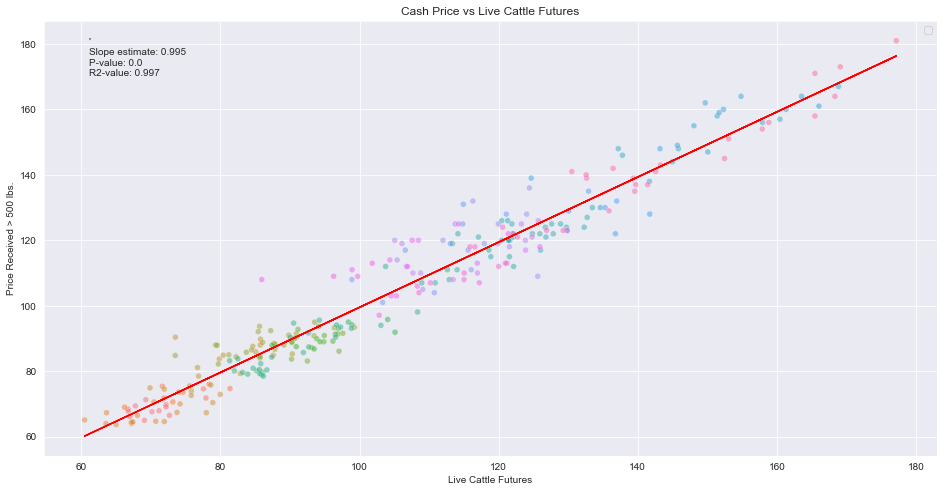

In [5]:
src.scatterplot(
    price_received_ge_500_national,
    live_cattle_futures,
    'Price Received > 500 lbs.',
    'Live Cattle Futures',
    resample='M',
    reg=True,
    title='Cash Price vs Live Cattle Futures',
    constant=False
)

### Feeder cattle futures vs. Cash price

In [6]:
feeder_cattle_futures = pd.read_csv('csv/feeder_cattle_futures.csv')
feeder_cattle_futures = src.clean_tv_data(feeder_cattle_futures)

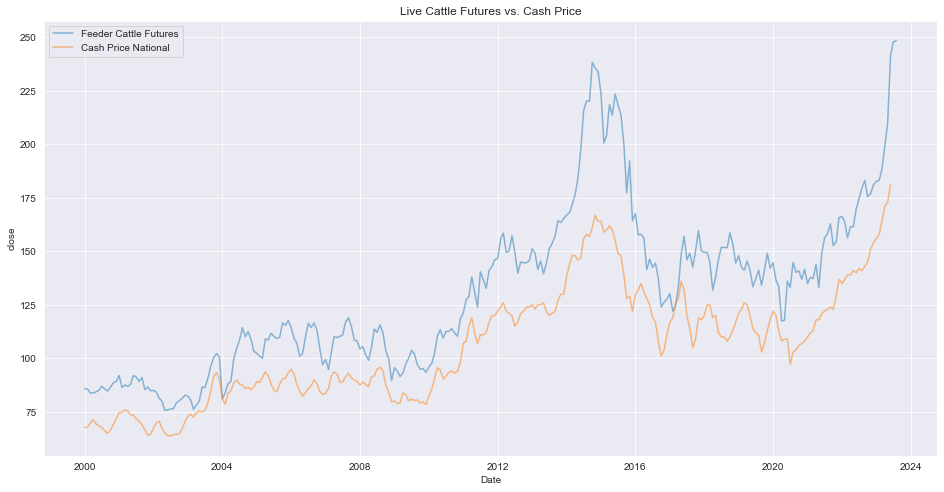

In [7]:
src.lineplot_mult_same_axis(
    feeder_cattle_futures.resample('MS').first(),
    price_received_ge_500_national,
    "Feeder Cattle Futures",
    'Cash Price National',
    title="Live Cattle Futures vs. Cash Price")

No handles with labels found to put in legend.


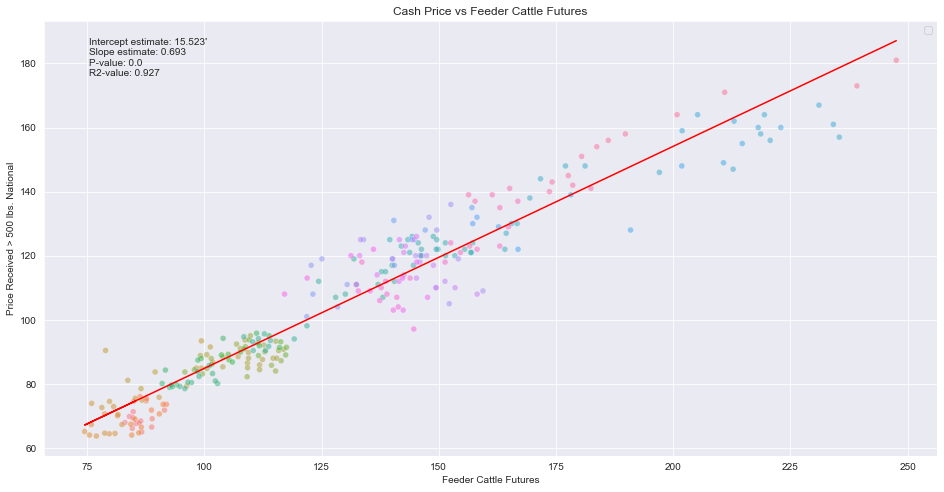

In [8]:
src.scatterplot(
    price_received_ge_500_national,
    feeder_cattle_futures,
    'Price Received > 500 lbs. National',
    'Feeder Cattle Futures',
    resample='M',
    reg=True,
    title='Cash Price vs Feeder Cattle Futures',
    constant=True
)


### Basis by state

In [9]:
price_received_ge_500_state = pd.read_csv('csv/price_received_ge_500_state.csv')
price_received_ge_500_state = src.usda_clean_monthly(price_received_ge_500_state, only_value=False)


In [10]:
price_received_ge_500_state = pd.pivot_table(price_received_ge_500_state, values='Value', index=['Date'], columns=['State'])

<AxesSubplot:xlabel='Date'>

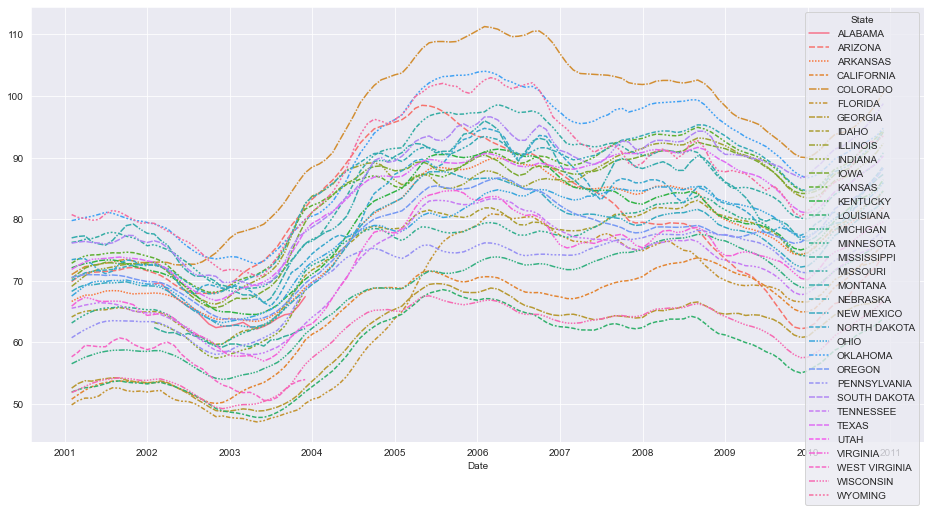

In [11]:
sns.lineplot(data=price_received_ge_500_state.rolling(14).mean())